# Wine Quality Analysis

## 1. Understanding of Data Source

The data is downloaded from kaggle (https://www.kaggle.com/yasserh/wine-quality-dataset). 

The dataset is originally from following resource:
    "Paulo Cortez, University of Minho, Guimarães, Portugal, http://www3.dsi.uminho.pt/pcortez
    A. Cerdeira, F. Almeida, T. Matos and J. Reis, Viticulture Commission of the Vinho Verde Region(CVRVV), Porto, Portugal @2009",
    according to UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/wine+quality).


### 1.1 Background

Wine is an alcoholic drink typically made from fermented grapes. There are many factors affecting tastes of wine. The data source has following variables:
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)

### 1.2 Questions
Several questions I wish to address:
(1) Build up a machine learning model to predict wine quality
(2) Find factors that affect the quality of wine tasting
(3) Whether there is a relationship between different variables

## 2. Import & Clean Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
w_data= pd.read_csv('WineQT.csv')
w_data['quality'] = w_data['quality'].astype('category')
w_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
w_data.drop('Id', axis=1, inplace=True)

In [4]:
w_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         1143 non-null   float64 
 1   volatile acidity      1143 non-null   float64 
 2   citric acid           1143 non-null   float64 
 3   residual sugar        1143 non-null   float64 
 4   chlorides             1143 non-null   float64 
 5   free sulfur dioxide   1143 non-null   float64 
 6   total sulfur dioxide  1143 non-null   float64 
 7   density               1143 non-null   float64 
 8   pH                    1143 non-null   float64 
 9   sulphates             1143 non-null   float64 
 10  alcohol               1143 non-null   float64 
 11  quality               1143 non-null   category
dtypes: category(1), float64(11)
memory usage: 99.7 KB


In [5]:
w_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [6]:
w_data['quality'].value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

I would use quality as our dependent variable while other variables as our independent variables.

### 2.1 Missing value

In [7]:
w_data.isnull().count()

fixed acidity           1143
volatile acidity        1143
citric acid             1143
residual sugar          1143
chlorides               1143
free sulfur dioxide     1143
total sulfur dioxide    1143
density                 1143
pH                      1143
sulphates               1143
alcohol                 1143
quality                 1143
dtype: int64

All data is not missing and has a reasonable range. The data type is also acceptable. 

### 2.2 Imbalanced data check 

There maybe a lot of normal quality wine and small amount of good or bad wine. 

(array([  6.,   0.,  33.,   0., 483.,   0., 462.,   0., 143.,  16.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

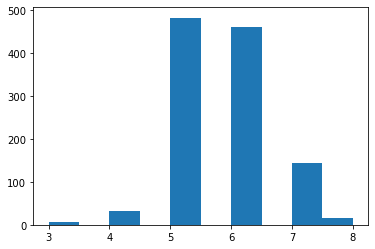

In [8]:
plt.hist(w_data.quality)

I will deal with imbalanced data in later session.

### 2.3 Distribution & Outlier

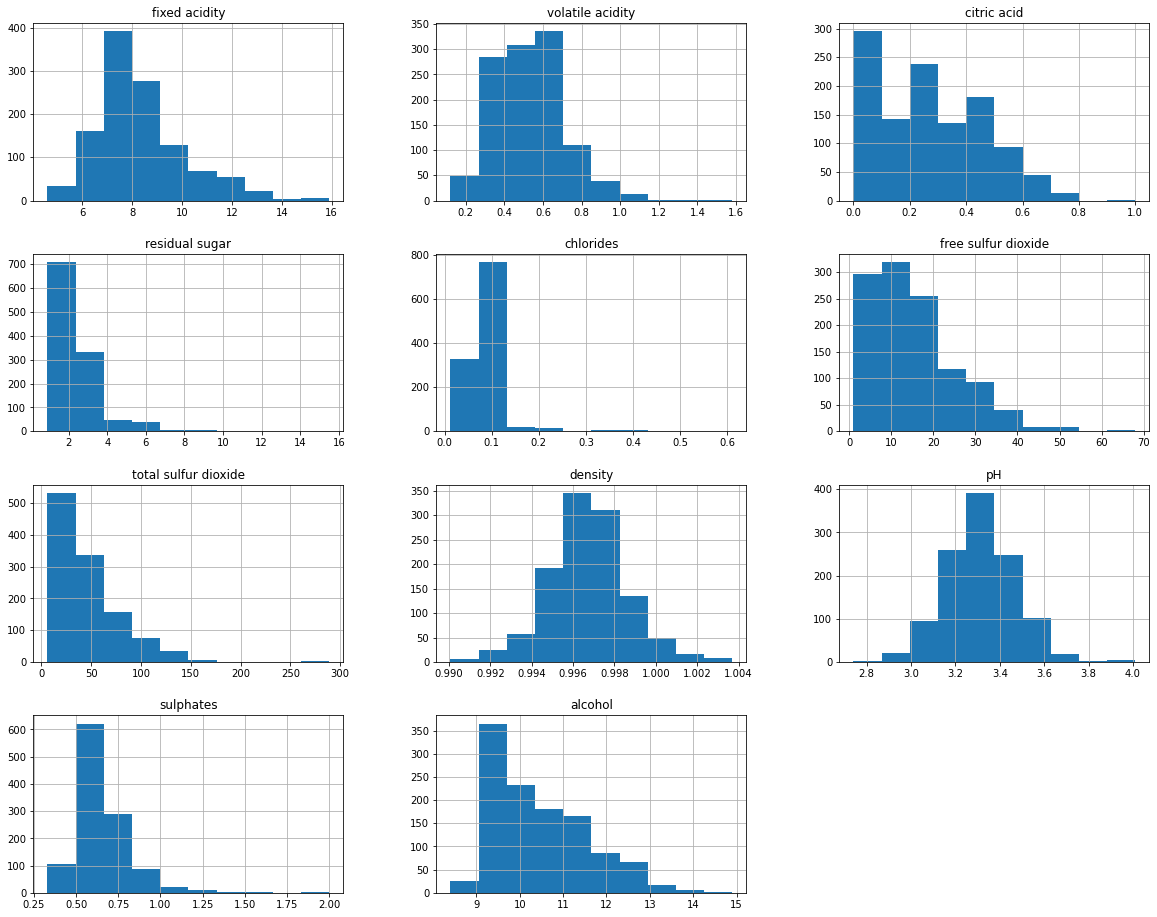

In [9]:
w_data.hist(figsize=(20,16))
plt.show()

<AxesSubplot:>

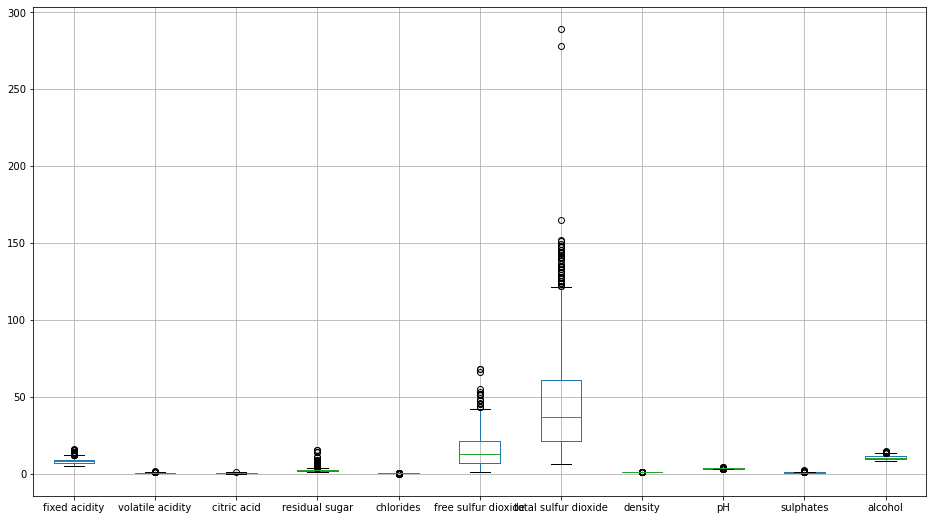

In [10]:
w_data.boxplot(figsize=(16,9))

Thus, our dataset has following problems:
- Right skewed: alcohol, chlorides, citric acid, acidity, free sulfur, sugar, sulphates, total sulfur dioxide, volatile acidity : log transformation
- Our data have outlier: See leverage
- Our data need a normalization

In [11]:
w_data_log=pd.DataFrame()
w_data_log['alcohol']= np.log(w_data['alcohol'])
w_data_log['chlorides']= np.log(w_data['chlorides']+10)
w_data_log['citric acid']= np.log(w_data['citric acid']+1)
w_data_log['fixed acidity']= np.log(w_data['fixed acidity'])
w_data_log['free sulfur dioxide']= np.log(w_data['free sulfur dioxide'])
w_data_log['residual sugar']= np.log(w_data['residual sugar'])
w_data_log['sulphates']= np.log(w_data['sulphates']+1)
w_data_log['total sulfur dioxide']= np.log(w_data['total sulfur dioxide'])
w_data_log['volatile acidity']= np.log(w_data['volatile acidity'])

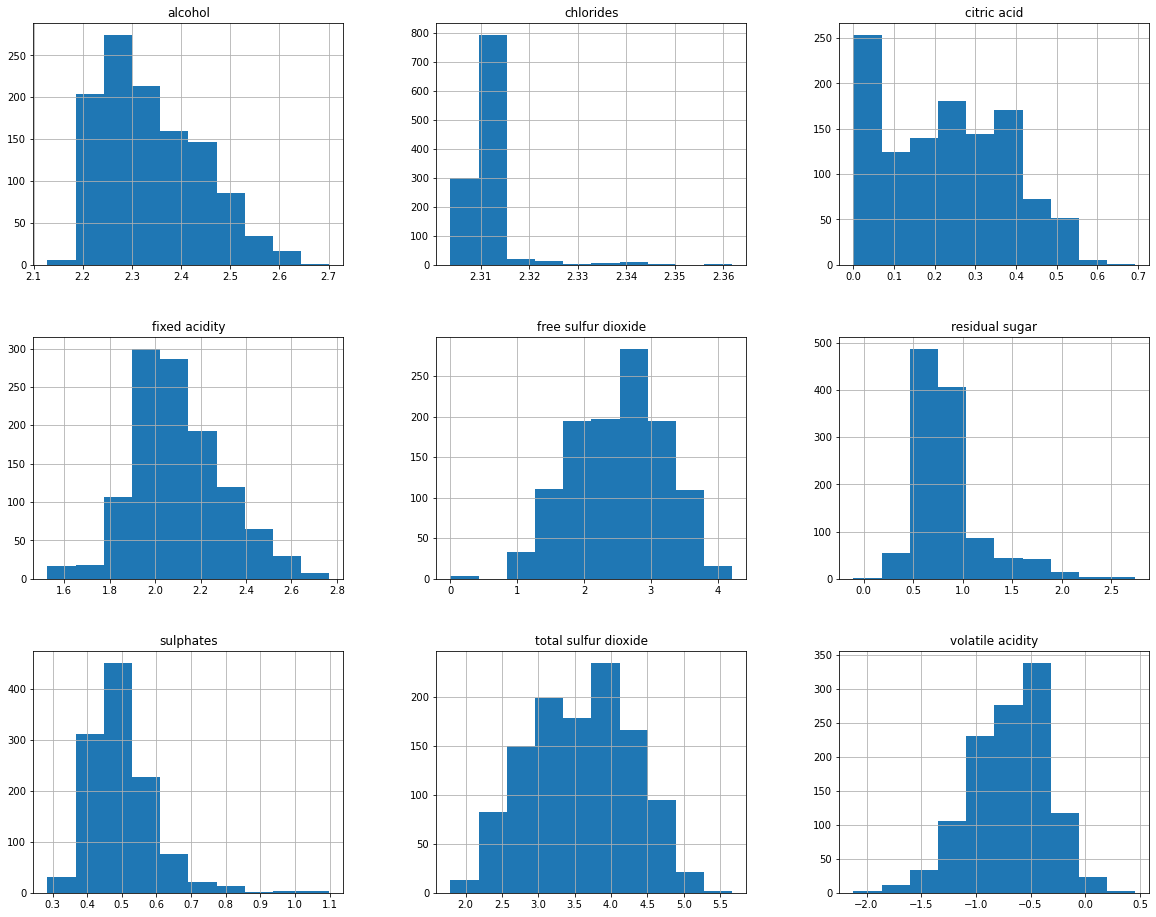

In [12]:
w_data_log.hist(figsize=(20,16))
plt.show()

I want to try Box Cox methods

In [13]:
from scipy import stats

In [14]:
w_data_box=pd.DataFrame()
w_data_box['alcohol'], fitted_lambda= stats.boxcox(w_data['alcohol'])
w_data_box['chlorides'], fitted_lambda= stats.boxcox(w_data['chlorides']+1)
w_data_box['citric acid'], fitted_lambda= stats.boxcox(w_data['citric acid']+1)
w_data_box['fixed acidity'], fitted_lambda= stats.boxcox(w_data['fixed acidity'])
w_data_box['free sulfur dioxide'], fitted_lambda= stats.boxcox(w_data['free sulfur dioxide'])
w_data_box['residual sugar'], fitted_lambda= stats.boxcox(w_data['residual sugar'])
w_data_box['sulphates'], fitted_lambda= stats.boxcox(w_data['sulphates']+1)
w_data_box['total sulfur dioxide'], fitted_lambda= stats.boxcox(w_data['total sulfur dioxide'])
w_data_box['volatile acidity'], fitted_lambda= stats.boxcox(w_data['volatile acidity']+1)

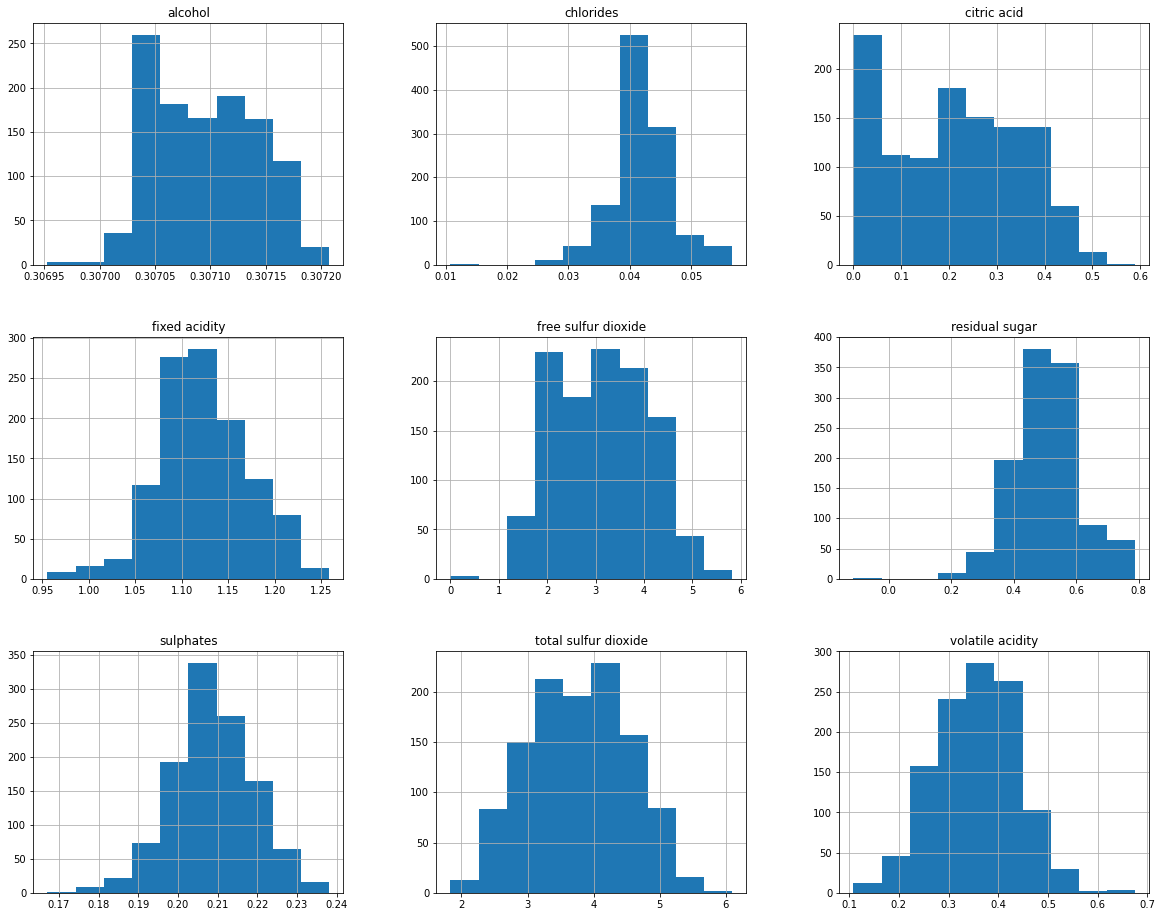

In [15]:
w_data_box.hist(figsize=(20,16))
plt.show()

I think box cox has a great performance in making distribution normal.

In [16]:
w_data_2=pd.DataFrame()
w_data_2['alcohol']= w_data_box['alcohol']
w_data_2['chlorides']= w_data_box['chlorides']
w_data_2['fixed acidity']= w_data_box['fixed acidity']
w_data_2['free sulfur dioxide']= w_data_box['free sulfur dioxide']
w_data_2['residual sugar']= w_data_box['residual sugar']
w_data_2['sulphates']= w_data_box['sulphates']
w_data_2['total sulfur dioxide']= w_data_box['total sulfur dioxide']
w_data_2['volatile acidity']= w_data_box['volatile acidity']

w_data_2['citric acid']= w_data['citric acid']
w_data_2['density']= w_data['density']
w_data_2['pH']= w_data['pH']
w_data_2['quality']= w_data['quality']

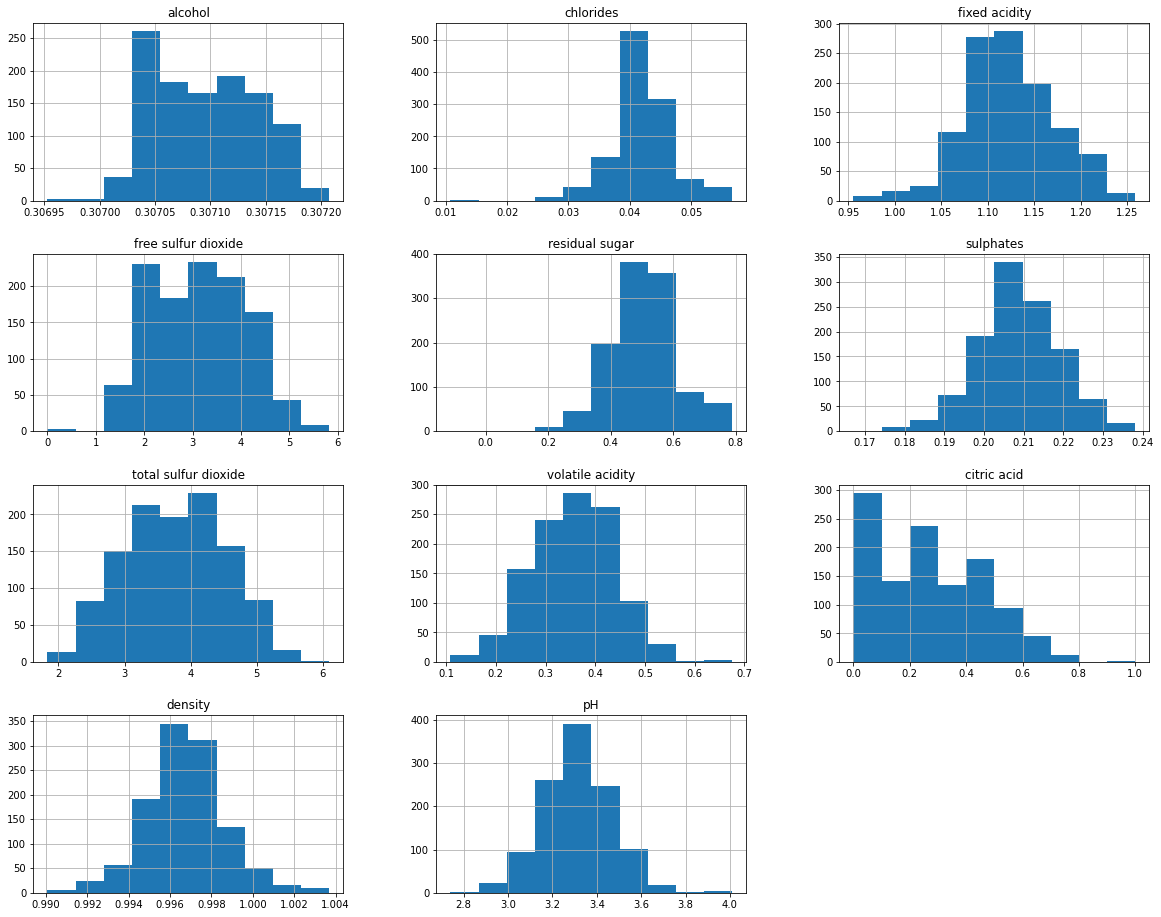

In [17]:
w_data_2.hist(figsize=(20,16))
plt.show()

In [18]:
from sklearn.preprocessing import scale
for i in range(11):
    w_data_2.iloc[:,i] = scale(w_data_2.iloc[:,i])

<AxesSubplot:>

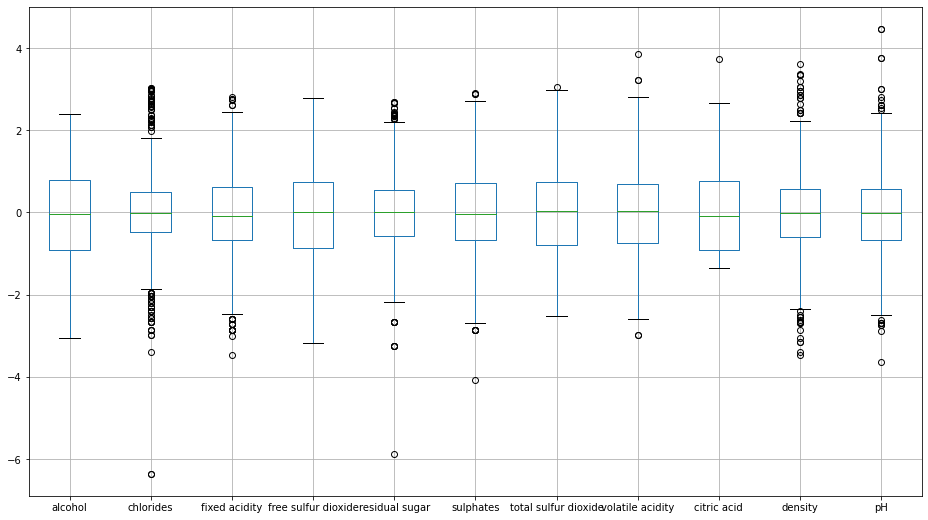

In [19]:
w_data_2.boxplot(figsize=(16,9))

### Correlation Check

<AxesSubplot:>

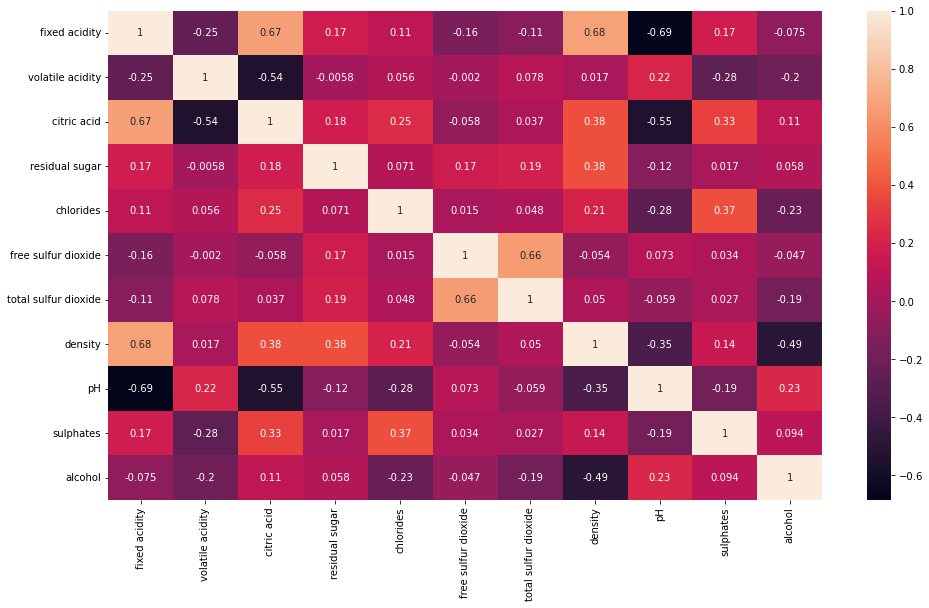

In [20]:
plt.figure(figsize=(16,9))
sns.heatmap(w_data.corr(),annot=True)

Summary:
- Positive relations: fixed acidity, citric acid, residual sugar, sulphates, acohol
- Negative relations: volatile acidity, chlorides, free sulfur dioxide, total sulfur dioxide, density, ph
- High corrlation: ph and fixed acidity(understandable) ph and critric acid,critric acid and volatile acidity, density and alcohol, which are all understandable

In [21]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from collections import Counter

Class=5, n=483 (42.257%)
Class=6, n=462 (40.420%)
Class=7, n=143 (12.511%)
Class=4, n=33 (2.887%)
Class=8, n=16 (1.400%)
Class=3, n=6 (0.525%)


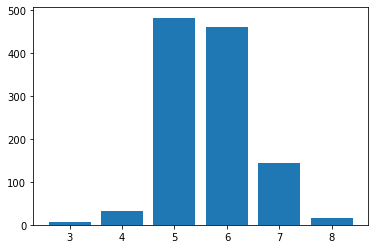

In [22]:
data = w_data_2.values
X, y = data[:, :-1], data[:, -1]
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

Class=5, n=483 (16.667%)
Class=6, n=483 (16.667%)
Class=7, n=483 (16.667%)
Class=4, n=483 (16.667%)
Class=8, n=483 (16.667%)
Class=3, n=483 (16.667%)


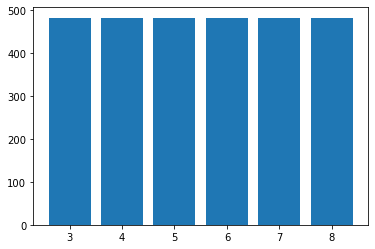

In [23]:
from sklearn.preprocessing import LabelEncoder
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

## 3. Modeling

### 3.1.1 Linear Regression:

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [26]:
x=w_data_2.iloc[:,:11]
y=w_data_2.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(w_data_2.iloc[:,:11], w_data_2.iloc[:,-1], test_size=0.3,random_state=0)

In [27]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
LR  = LinearRegression()
LR.fit(x_train, y_train)
y_pred=LR.predict(x_test)
print('Coef:', LR.coef_, 'Intercept:', LR.intercept_, 'MES:', mean_squared_error(y_pred,y_test))

Coef: [ 0.26037612 -0.04842679  0.07468765  0.03620794  0.00770692  0.21760671
 -0.07726284 -0.17436258 -0.05545823 -0.09015836 -0.06822791] Intercept: 5.671651045768317 MES: 0.35932372227644205


In [28]:
# try cross validation
scores = cross_val_score(LR, x, y, cv=10)

In [29]:
scores

array([-0.01792004,  0.4173387 ,  0.26795336,  0.41481936, -0.03708288,
        0.42617749,  0.33710221,  0.33745807,  0.22275517,  0.33192592])

Because the coefs are all small and not significant, it may due to over fitting.

### 3.1.2 Linear Regression Lasso

In [30]:
from sklearn.linear_model import LassoCV
LR1_CV = LassoCV(cv=10).fit(x_train, y_train)
y_Lasso_pred = LR1_CV.predict(x_test)
print("MSE:",mean_squared_error(y_test, y_Lasso_pred))

MSE: 0.3627545837320244


In [31]:
LR1_CV.coef_

array([ 0.26885063, -0.03862472,  0.        ,  0.        , -0.        ,
        0.19044228, -0.04668111, -0.15916291, -0.        , -0.04010321,
       -0.06280222])

I do not think Linear is not a great way to learn about the questions. I want to use the classification methods. I want to first classify wine to good, ok, bad.

In [32]:
w_data['quality'].describe()

count     1143
unique       6
top          5
freq       483
Name: quality, dtype: int64

### 3.2.1 SVM

In [87]:
import sklearn as sk
from sklearn import svm

SVM = svm.LinearSVC()
SVM.fit(x_train, y_train)
y_svm_pred= SVM.predict(x_test)
mean_squared_error(y_test, y_svm_pred)
SVM.score(x_test,y_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


0.641399416909621

In [34]:
from sklearn.svm import SVC

In [89]:
SVM_kernel=SVC( kernel='poly', degree=3)
SVM_kernel.fit(x_train,y_train)
y_svmk_pred= SVM_kernel.predict(x_test)
mean_squared_error(y_test, y_svmk_pred)
SVM_kernel.score(x_test,y_test)

0.6180758017492711

In [90]:
SVM_kernel=SVC(kernel='rbf')
SVM_kernel.fit(x_train,y_train)
y_svmk_pred= SVM_kernel.predict(x_test)
mean_squared_error(y_test, y_svmk_pred)

0.39067055393586003

In [91]:
SVM_kernel.score(x_test,y_test)

0.6705539358600583

Not ideal, I will try KNN

### 3.2.2 KNN

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
knn = KNeighborsClassifier() 
knn.fit(x_train,y_train)
y_knn_pred=knn.predict(x_test)
mean_squared_error(y_test, y_knn_pred)

0.6122448979591837

In [59]:
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i) 
    knn.fit(x_train,y_train)
    y_knn_pred=knn.predict(x_test)
    print(mean_squared_error(y_test, y_knn_pred))

0.6064139941690962
0.6909620991253644
0.6967930029154519
0.6005830903790087
0.6122448979591837
0.5568513119533528
0.5685131195335277
0.5276967930029155
0.5422740524781341


In [78]:
knn.score(x_train,y_train)

0.67375

When K=3 have the best performance.

### 3.3 Tree Model

In [64]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
y_tree_pred=clf.predict(x_test)
print(mean_squared_error(y_test, y_tree_pred))

0.6763848396501457


In [76]:
clf.score(x_test,y_test)

0.5335276967930029

### 3.4 Random Forest Model

In [73]:
from sklearn.ensemble import RandomForestClassifier
Rfclf = RandomForestClassifier(n_estimators=50)
Rfclf.fit(x_train, y_train)
y_rf_pred=Rfclf.predict(x_test)
print(mean_squared_error(y_test, y_rf_pred))

0.43440233236151604


In [75]:
Rfclf.score(x_test,y_test)

0.6530612244897959

### 3.5 XGBoost Classifier

In [82]:
conda install -c conda-forge xgboost

Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0           8 KB  conda-forge
    ca-certificates-2021.10.8  |       h033912b_0         139 KB  conda-forge
    certifi-2021.10.8          |   py37hf985489_1         145 KB  conda-forge
    libxgboost-1.5.1           |   cpu_h598c753_2         2.2 MB  conda-forge
    openssl-1.1.1l             |       h0d85af4_0         1.9 MB  conda-forge
    py-xgboost-1.5.1           |cpu_py37h5be20f2_2         151 KB  conda-forge
    xgboost-1.5.1              |cpu_py37haa29005_2          12 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         4.5 MB

The following NEW packages will be INSTALLED:

  

In [101]:
from xgboost import XGBClassifier
xgbc = XGBClassifier()
xgbc.fit(x_train, y_train)
y_pred=xgbc.predict(x_test)
score = xgbc.score(x_test, y_test)
score

/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:23:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.6268221574344023

KNN have an overall great performance. Then I hope to see what's the most important variables among all variables.

In [94]:
from sklearn.decomposition import PCA
pca = PCA(n_components=11)
pca.fit(x)

PCA(n_components=11)

In [95]:
pca.explained_variance_ratio_

array([0.29701292, 0.18576522, 0.15205943, 0.09941356, 0.08272726,
       0.05709217, 0.04777064, 0.03239497, 0.02445702, 0.01525698,
       0.00604983])

In [96]:
pca.explained_variance_

array([3.270003  , 2.04520677, 1.67411843, 1.09450672, 0.91079668,
       0.62856377, 0.52593719, 0.35665668, 0.26926278, 0.16797376,
       0.06660644])

In [100]:
pca.feature_names_in_

array(['alcohol', 'chlorides', 'fixed acidity', 'free sulfur dioxide',
       'residual sugar', 'sulphates', 'total sulfur dioxide',
       'volatile acidity', 'citric acid', 'density', 'pH'], dtype=object)

We know know, alcohol, chlorides, fixed acidity may have the most significent influence on quality of wine.
Summary:
Data processing:
1. Our data does not have problem of missing
2. Our data has a problem of imbalanced data. I adjusted it using SMOTE.
3. the distribution of data is not normal, and I choose to use box-cox method to adjust the problem.
4. As for the outlier, I kept them at here first. for the future research, I may try different methods to adjust that.
5. I tried several machine learning models. KNN has a good performance.
6. I found alcohol, chlorides, and fixed acidity are three most important factors using PCA methods.